# Analyzing the linear frequency modulation using the Wigner-Ville distribution

In [6]:
import DSP
using PyPlot

In [7]:
# include all modules in juwvid
include("../juwvid.jl")

juwvid

### CASE 1:  the linear FM signal whose amplitude is large

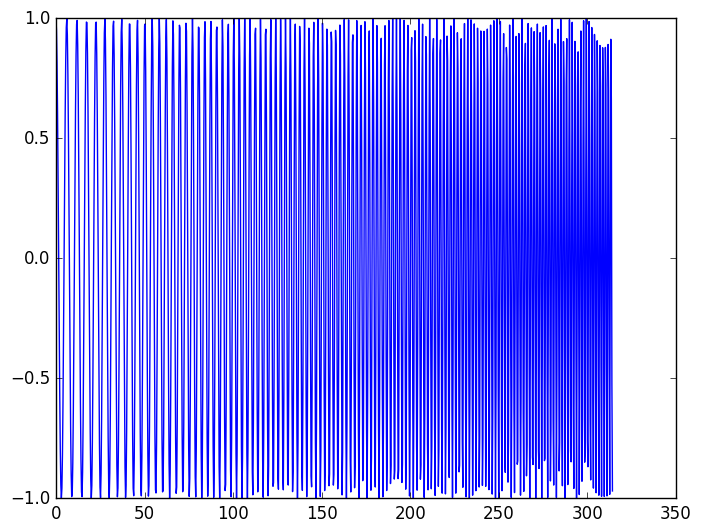

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x316be2410>

In [9]:
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.01);
PyPlot.plot(x,y)

In [11]:
### generating the analytic signal of y
zs=DSP.Util.hilbert(y); 

#### The Wigner-Ville distribution

In [12]:
tfrs=cohenclass.tfrwv(zs);

Single Wigner Ville
Use fft.


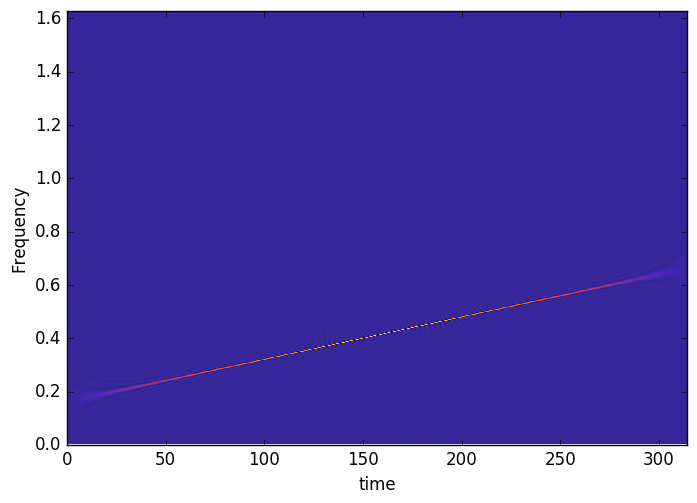

PyObject <matplotlib.text.Text object at 0x3241f0190>

In [32]:
a=juwplot.tfrshow(tfrs,x[2]-x[1],x[1],x[end])
#colorbar(a) # uncomment if you show a colorbar
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

In [13]:
### extracting the instantaneous frequency (IF) from the TFR
indfs=extif.maxif(abs(tfrs));
dx=x[2]-x[1]
if_ffts=juwutils.index_to_frequency(indfs,NaN,dx,nsample);

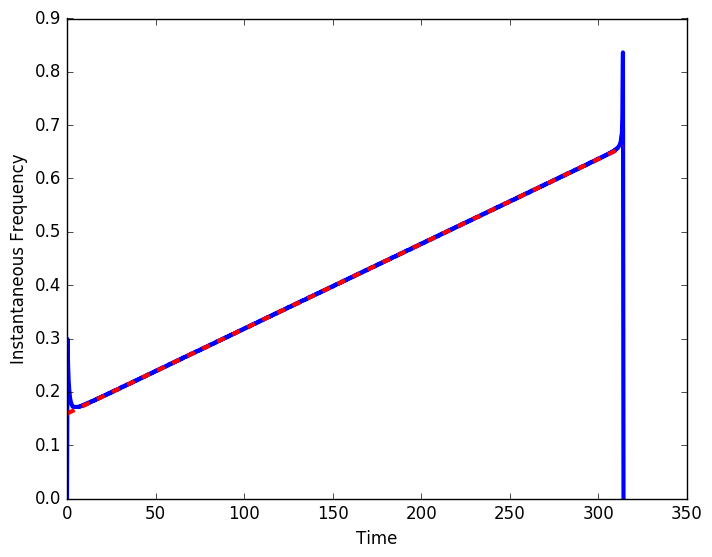

PyObject <matplotlib.text.Text object at 0x31dde3090>

In [16]:
### displaying the extracted IF
PyPlot.plot(x,if_ffts,color="blue",lw=3)
PyPlot.plot(x,iw/(2*pi),ls="dashed",color="red",lw=3)
PyPlot.ylabel("Instantaneous Frequency")
PyPlot.xlabel("Time")

### Case 2: the linear FM whose amplitude is small

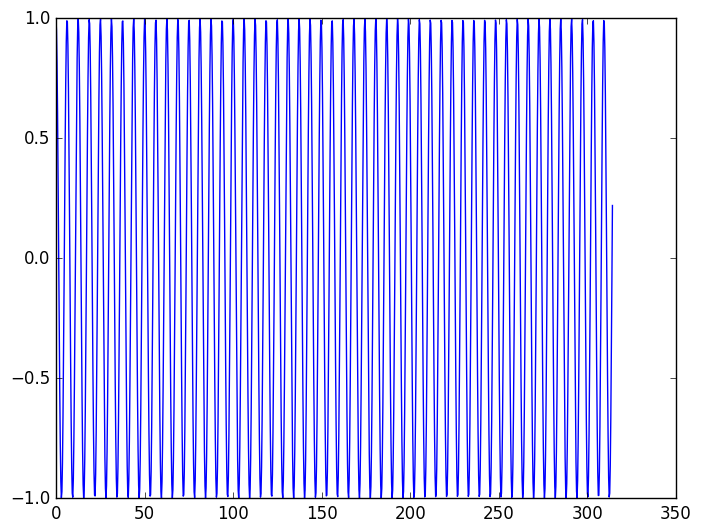

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e305b10>

In [17]:
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.0001);
PyPlot.plot(x,y)

In [18]:
### z is the analytic signal of y
z=DSP.Util.hilbert(y); 

#### Wigner-Ville distribution with FFT

In [19]:
tfr=cohenclass.tfrwv(z);

Single Wigner Ville
Use fft.


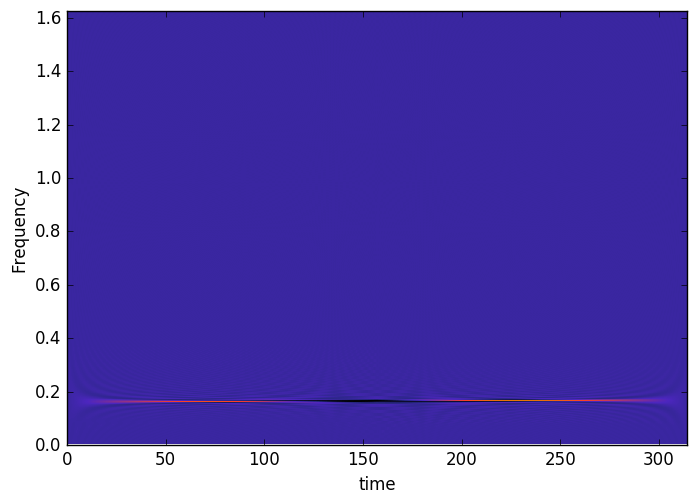

PyObject <matplotlib.text.Text object at 0x32ee84290>

In [53]:
a=juwplot.tfrshow(tfr,x[2]-x[1],x[1],x[end])
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")
# Because the amplitude is small, you hardly see the modulation by eye. 

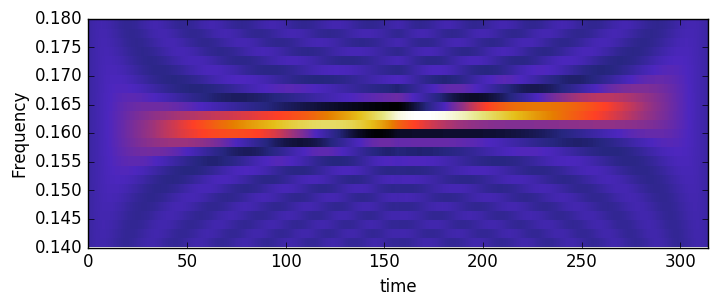

PyObject <matplotlib.text.Text object at 0x333257d50>

In [59]:
# If you zoom up the TFR, you find that the resolution is poor because of the sampling rate.
a=juwplot.tfrshow(tfr,x[2]-x[1],x[1],x[end],NaN,NaN,15.0)
PyPlot.ylim(0.14,0.18)
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

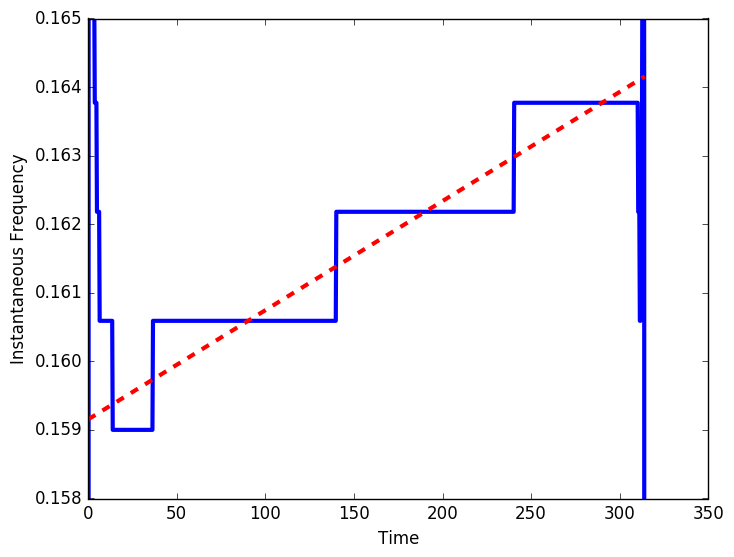

(0.158,0.165)

In [20]:
### As shown in this figure, the FFT(DFT) cannot provide the sufficient resolution of the frequency.
indf=extif.maxif(abs(tfr));
dx=x[2]-x[1]
if_fft=juwutils.index_to_frequency(indf,NaN,dx,nsample);
PyPlot.plot(x,if_fft,color="blue",lw=3)
PyPlot.plot(x,iw/(2*pi),ls="dashed",color="red",lw=3)
PyPlot.ylabel("Instantaneous Frequency")
PyPlot.xlabel("Time")
PyPlot.ylim(0.158,0.165)

### using Non-Uniform FFT

In [23]:
### Setting new frequency grid by dividing the frequency indices of f = 90 - 110 by 1024 grids
fin=collect(linspace(90,110,1024));
### Then, we compute the Wigner Ville distribution with the non-uniform FFT.
tfrnufft=cohenclass.tfrwv(z,NaN,NaN,fin,NaN,0);

Single Wigner Ville
Use nufft.


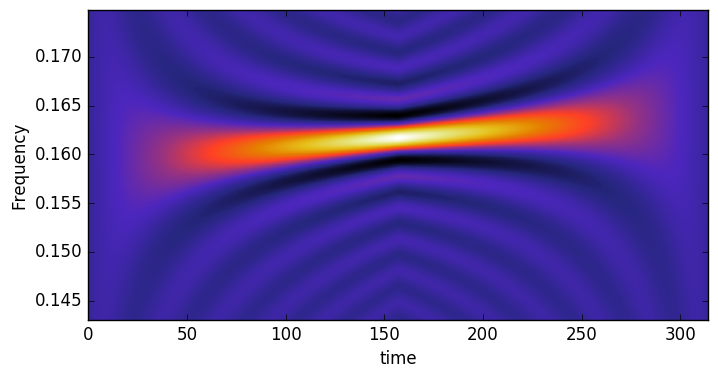

PyObject <matplotlib.text.Text object at 0x3375d0950>

In [72]:
a=juwplot.tfrshow(real(tfrnufft),x[2]-x[1],x[1],x[end],fin[1],fin[end],0.5)
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

In [24]:
indnf=extif.maxif(abs(tfrnufft));
dx=x[2]-x[1]
if_nufft=juwutils.index_to_frequency(indnf,fin,dx,nsample);

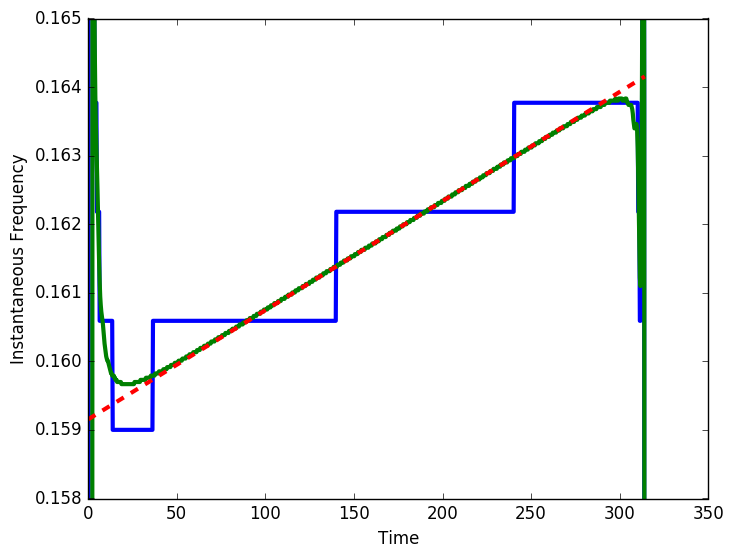

(0.158,0.165)

In [25]:
PyPlot.plot(x,if_fft,color="blue",lw=3)
PyPlot.plot(x,if_nufft,color="green",lw=3)
PyPlot.plot(x,iw/(2*pi),ls="dashed",color="red",lw=3)
PyPlot.ylabel("Instantaneous Frequency")
PyPlot.xlabel("Time")
PyPlot.ylim(0.158,0.165)

In [32]:
### sufficient resolution with the Non-uniform FFT !  